<a href="https://colab.research.google.com/github/macauli10/DiagnosticoAsma/blob/main/AlgGenetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 2 * X + 5 = 20

def equation_func(solution):
  X = solution[0]
  equation_outoput = 2 * X +5


In [ ]:
import numpy as np
from scipy.optimize import basinhopping

In [ ]:
def rosenbrock(x):
  return ((1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2)

bounds = [(-2, 2), (-2, 2)]
x0 = np.array([0, 0])

options = {'stepsize': 0.5, 'T': 1.0, 'niter': 100, 'disp': False}

result = basinhopping(rosenbrock, x0, minimizer_kwargs={'bounds': bounds},** options)


print(result)

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: 1.0111211233224538e-13
                          x: [ 1.000e+00  1.000e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 6336
                       njev: 2112
 lowest_optimization_result:  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
                              success: True
                               status: 0
                                  fun: 1.0111211233224538e-13
                                    x: [ 1.000e+00  1.000e+00]
                                  nit: 14
                                  jac: [ 1.650e-05 -5.293e-06]
                                 nfev: 84
                                 njev: 28
                             hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [ ]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
crises = ctrl.Antecedent(np.arange(0, 101, 1), 'crises')
saba = ctrl.Antecedent(np.arange(0, 101, 1), 'saba')
debito_expiratorio = ctrl.Antecedent(np.arange(0, 101, 1), 'debito_expiratorio')
gravidade = ctrl.Consequent(np.arange(0, 101, 1), 'gravidade')



In [ ]:
crises.automf(names=['semanal', 'diaria', 'continuo'])
saba.automf(names=['semanal', 'diaria', 'continuo'])
debito_expiratorio.automf(names=['50-80', '33-55', 'menos_33'])
gravidade.automf(names=['moderada', 'aguda_grave', 'risco_vida'])

In [ ]:
crises['semanal'] = fuzz.trapmf(crises.universe, [0, 0, 30, 50])
crises['diaria'] = fuzz.trapmf(crises.universe, [30, 50, 70, 90])
crises['continuo'] = fuzz.trapmf(crises.universe, [80, 90, 100, 100])

saba['semanal'] = fuzz.trapmf(saba.universe, [0, 0, 20, 40])
saba['diaria'] = fuzz.trapmf(saba.universe, [20, 40, 60, 80])
saba['continuo'] = fuzz.trapmf(saba.universe, [80, 90, 100, 100])

debito_expiratorio['50-80'] = fuzz.trapmf(debito_expiratorio.universe, [0, 0, 20, 40])
debito_expiratorio['33-55'] = fuzz.trapmf(debito_expiratorio.universe, [20, 40, 60, 80])
debito_expiratorio['menos_33'] = fuzz.trapmf(debito_expiratorio.universe, [80, 90, 100, 100])

gravidade['moderada'] = fuzz.trimf(gravidade.universe, [0, 30, 60])
gravidade['aguda_grave'] = fuzz.trimf(gravidade.universe, [30, 60, 85])
gravidade['risco_vida'] = fuzz.trimf(gravidade.universe, [90, 100, 100])


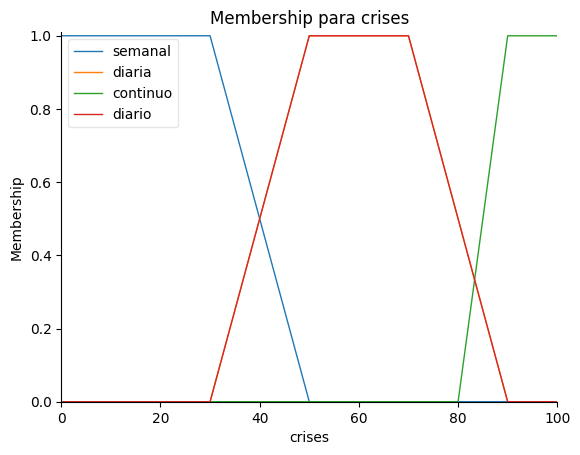

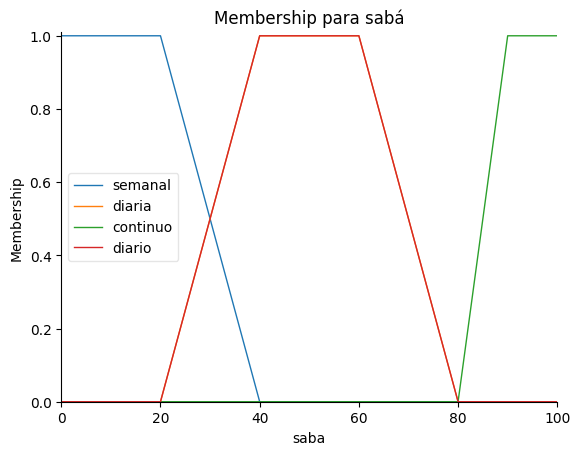

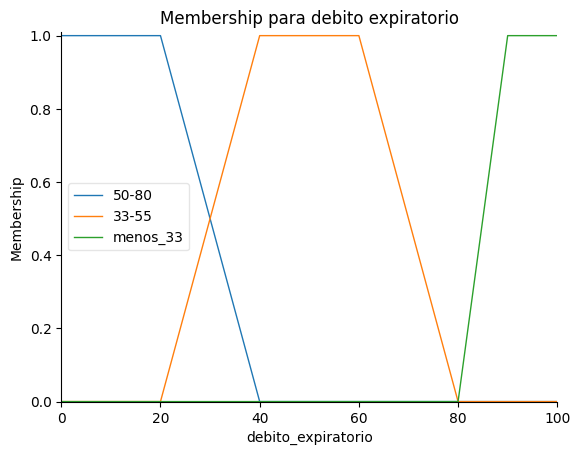

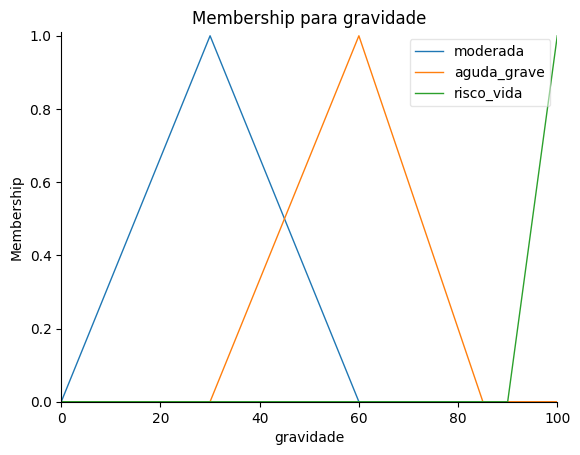

In [ ]:
crises.view()
plt.title('Membership para crises')
plt.show()
saba.view()
plt.title('Membership para sabá')
plt.show()
debito_expiratorio.view()
plt.title('Membership para debito expiratorio')
plt.show()
gravidade.view()
plt.title('Membership para gravidade')
plt.show()

In [ ]:
rule1 = ctrl.Rule(crises['semanal'] | saba['semanal'] | debito_expiratorio['50-80'], gravidade['moderada'])
rule2 = ctrl.Rule(crises['diaria'] | saba['diaria'] | debito_expiratorio['33-55'], gravidade['aguda_grave'])
rule3 = ctrl.Rule(crises['continuo'] | saba['continuo'] | debito_expiratorio['menos_33'], gravidade['risco_vida'])

In [ ]:
asma_control = ctrl.ControlSystem([rule1, rule2, rule3])
asma = ctrl.ControlSystemSimulation(asma_control)

In [ ]:
asma.input['crises'] = 30
asma.input['saba'] = 40
asma.input['debito_expiratorio'] = 90
asma.compute()

resultado_gravidade = asma.output['gravidade']
print(f'Gravidade: {resultado_gravidade}')
if 0 <= resultado_gravidade <= 30:
  print('moderada')
elif 30 < resultado_gravidade <= 60:
  print('aguda_grave')
else:
  print('risco_vida')

Gravidade: 48.18181818181816
aguda_grave
